In [1]:
import os
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate, cross_val_score as CVS

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', None)

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


#Tiền xử lý và phân tích dữ liệu

In [2]:
Mushroom_path = "mushrooms.csv" 

In [3]:
Mushroom_df = pd.read_csv(Mushroom_path)
Mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
"Data Shape (row, col): {}".format(Mushroom_df.shape)

'Data Shape (row, col): (8124, 23)'

In [5]:
Mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
Mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#Trực quan hóa dữ liệu

In [7]:
M_cols = Mushroom_df.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",Mushroom_df[col].value_counts(),"\n\n") 

Value Distribution:

class 
 class
e    4208
p    3916
Name: count, dtype: int64 


cap-shape 
 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64 


cap-surface 
 cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64 


cap-color 
 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64 


bruises 
 bruises
f    4748
t    3376
Name: count, dtype: int64 


odor 
 odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64 


gill-attachment 
 gill-attachment
f    7914
a     210
Name: count, dtype: int64 


gill-spacing 
 gill-spacing
c    6812
w    1312
Name: count, dtype: int64 


gill-size 
 gill-size
b    5612
n    2512
Name: count, dtype: int64 


gill-color 
 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o     

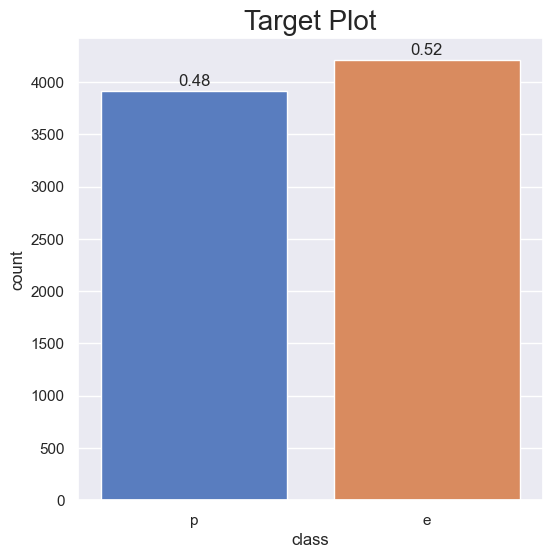

In [11]:
# Kích thước và style
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(data=Mushroom_df, x=M_cols[0], palette="muted")
# Tính tổng số mẫu
total = float(len(Mushroom_df[M_cols[0]]))
# Thêm tỷ lệ phần trăm lên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50, '{:1.2f}'.format(height/total), ha="center", fontsize=12)
plt.title("Target Plot", fontsize=20)
plt.show()

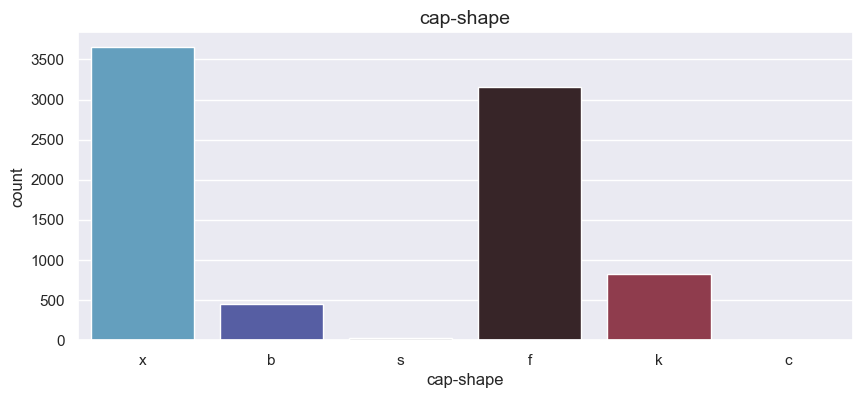

% of total:
cap-shape
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: count, dtype: float64


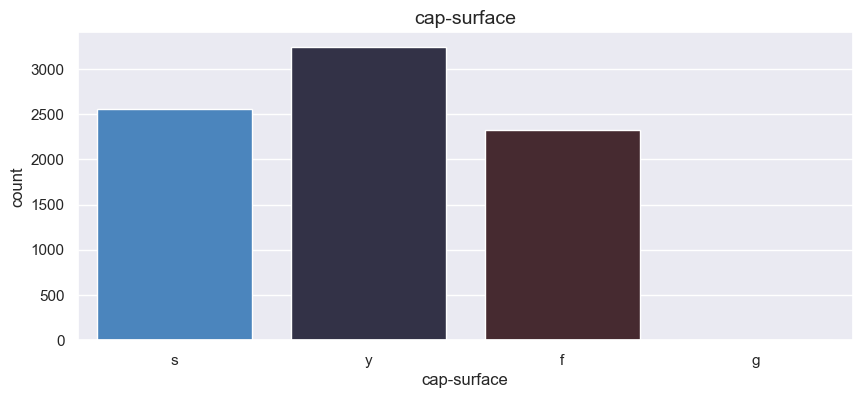

% of total:
cap-surface
y    39.93
s    31.46
f    28.56
g     0.05
Name: count, dtype: float64


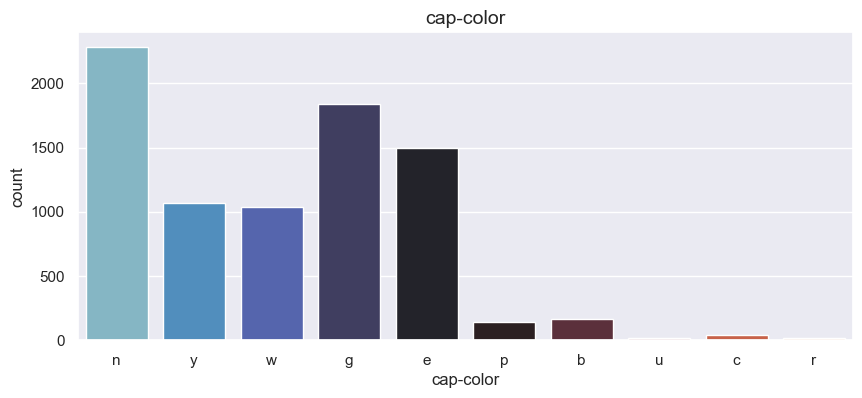

% of total:
cap-color
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: count, dtype: float64


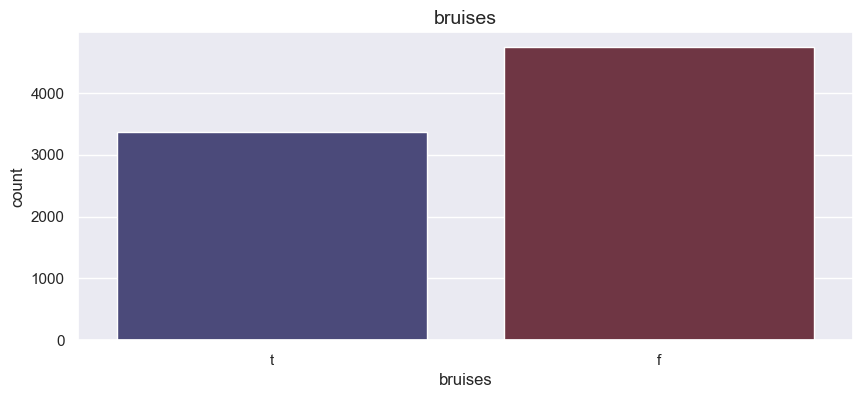

% of total:
bruises
f    58.44
t    41.56
Name: count, dtype: float64


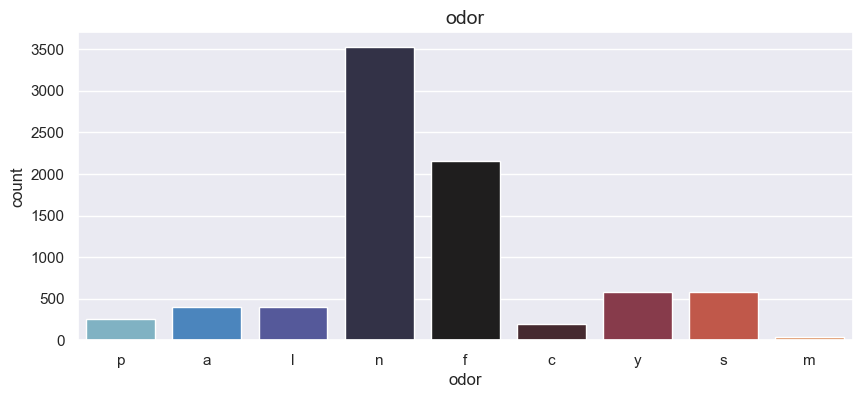

% of total:
odor
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: count, dtype: float64


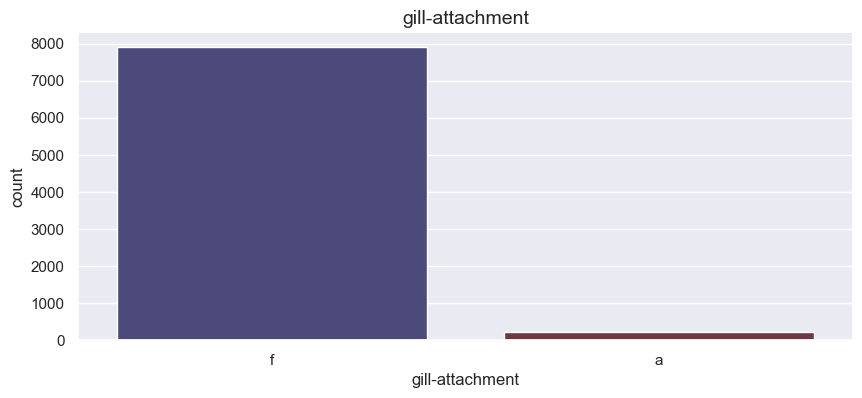

% of total:
gill-attachment
f    97.42
a     2.58
Name: count, dtype: float64


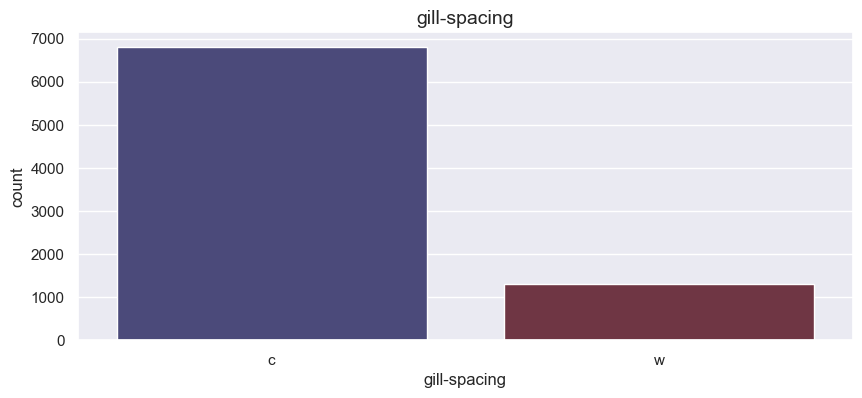

% of total:
gill-spacing
c    83.85
w    16.15
Name: count, dtype: float64


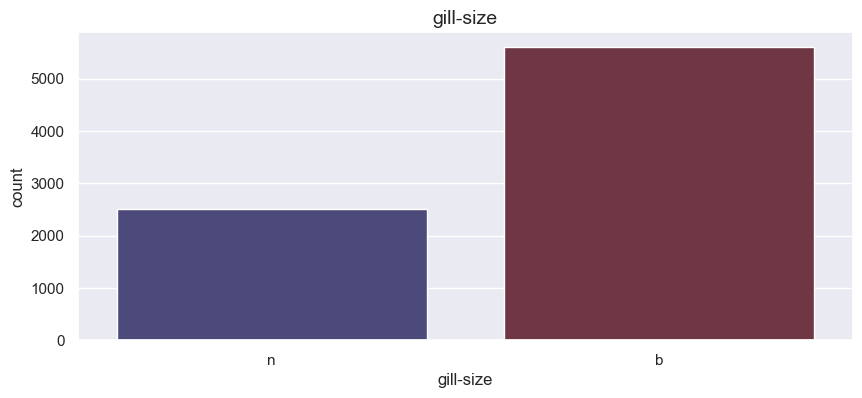

% of total:
gill-size
b    69.08
n    30.92
Name: count, dtype: float64


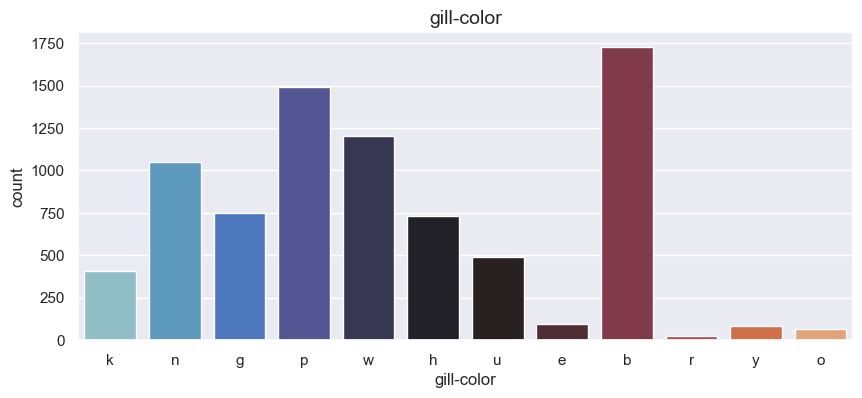

% of total:
gill-color
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: count, dtype: float64


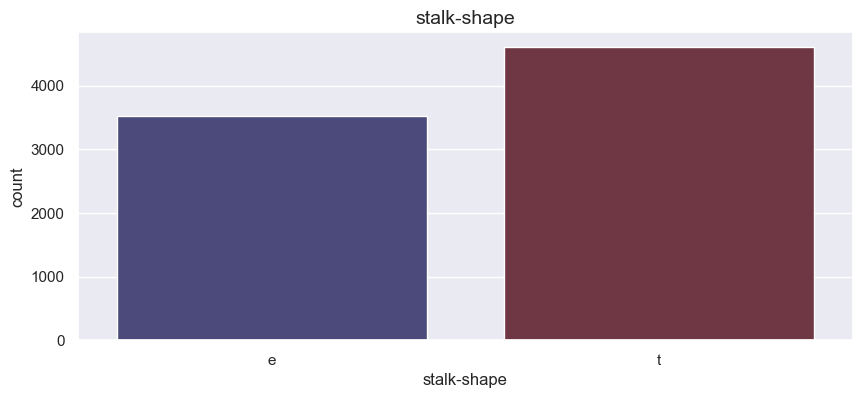

% of total:
stalk-shape
t    56.72
e    43.28
Name: count, dtype: float64


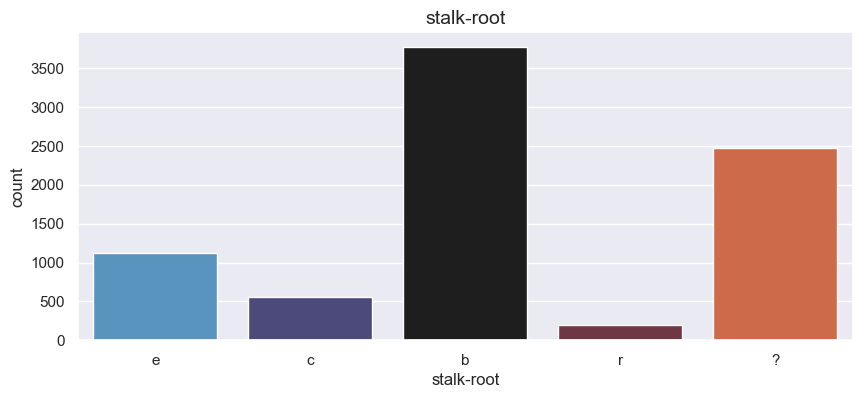

% of total:
stalk-root
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: count, dtype: float64


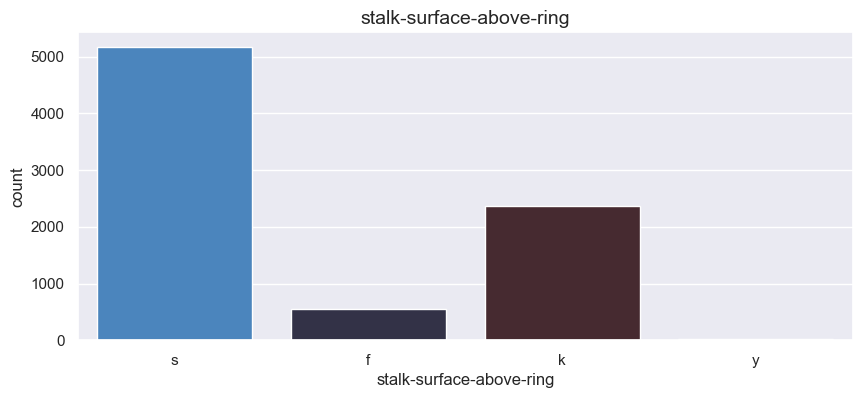

% of total:
stalk-surface-above-ring
s    63.71
k    29.20
f     6.79
y     0.30
Name: count, dtype: float64


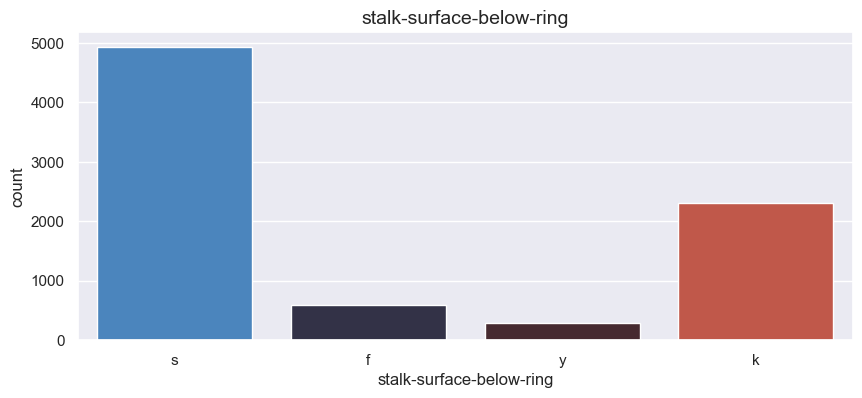

% of total:
stalk-surface-below-ring
s    60.76
k    28.36
f     7.39
y     3.50
Name: count, dtype: float64


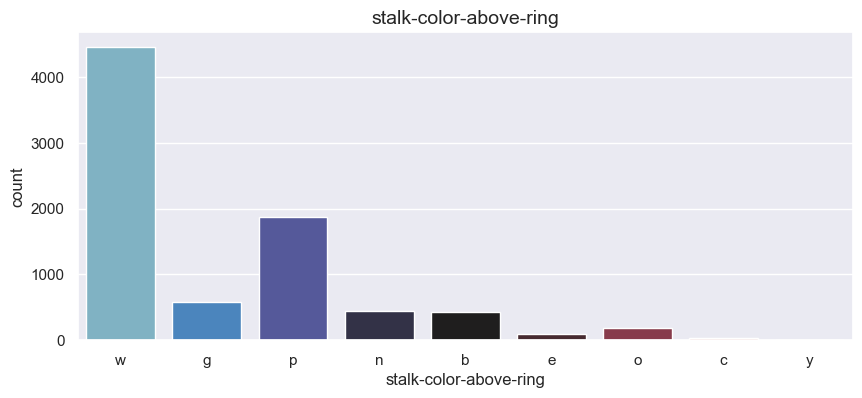

% of total:
stalk-color-above-ring
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: count, dtype: float64


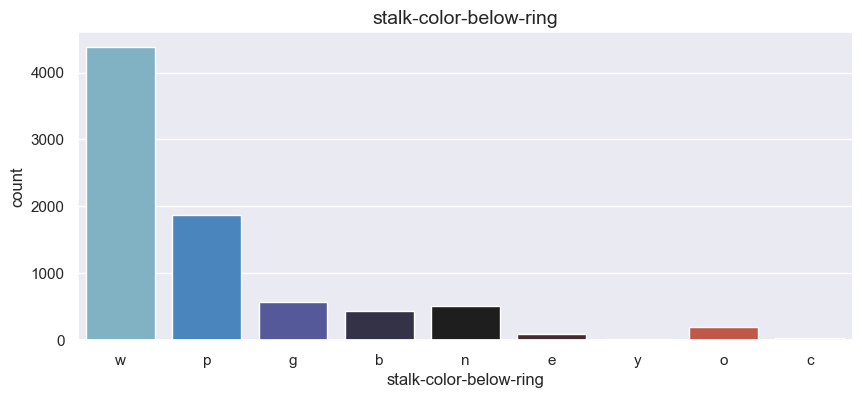

% of total:
stalk-color-below-ring
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: count, dtype: float64


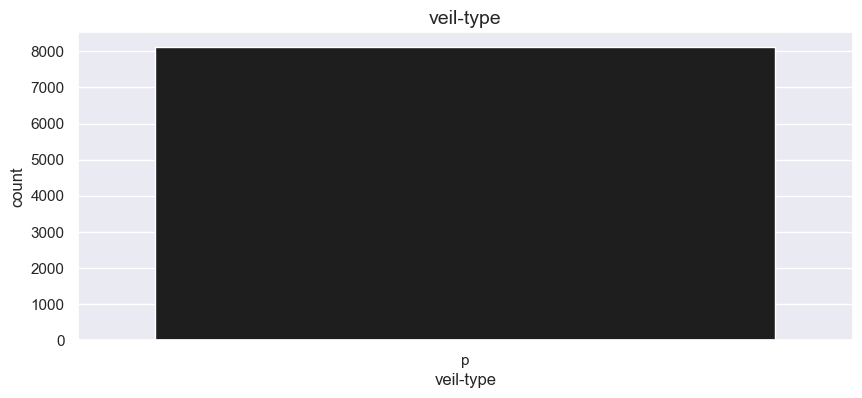

% of total:
veil-type
p    100.0
Name: count, dtype: float64


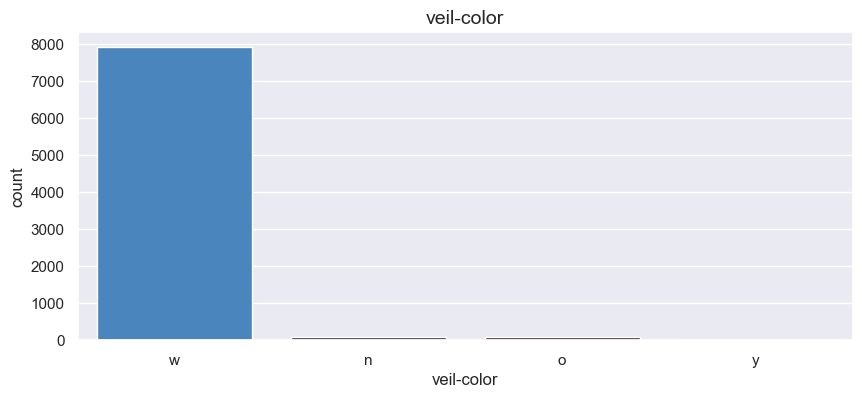

% of total:
veil-color
w    97.54
n     1.18
o     1.18
y     0.10
Name: count, dtype: float64


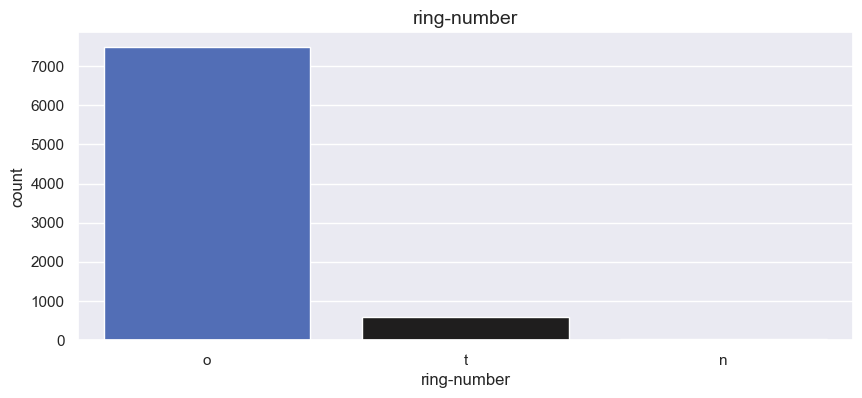

% of total:
ring-number
o    92.17
t     7.39
n     0.44
Name: count, dtype: float64


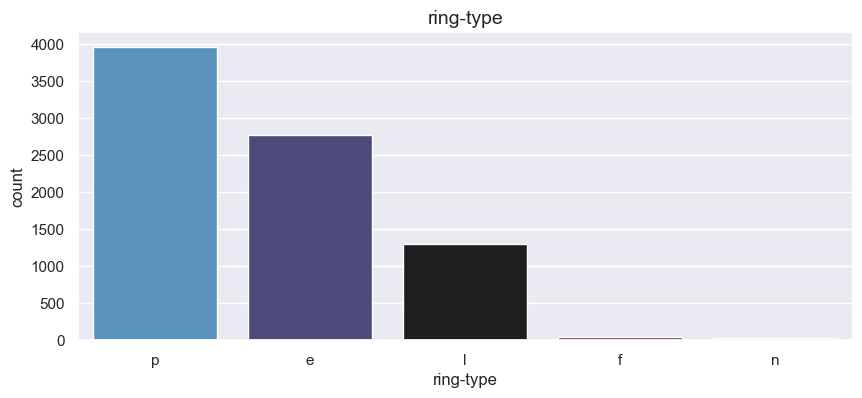

% of total:
ring-type
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: count, dtype: float64


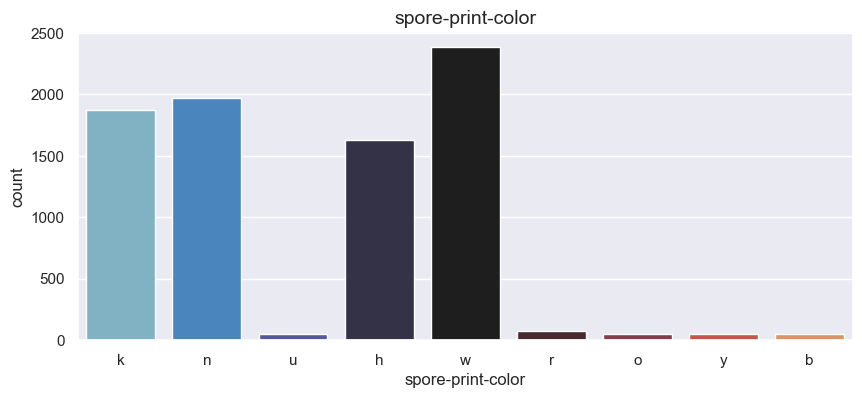

% of total:
spore-print-color
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: count, dtype: float64


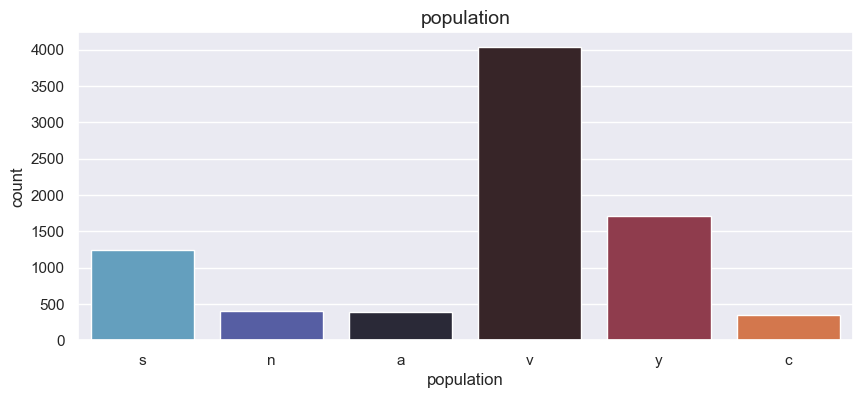

% of total:
population
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: count, dtype: float64


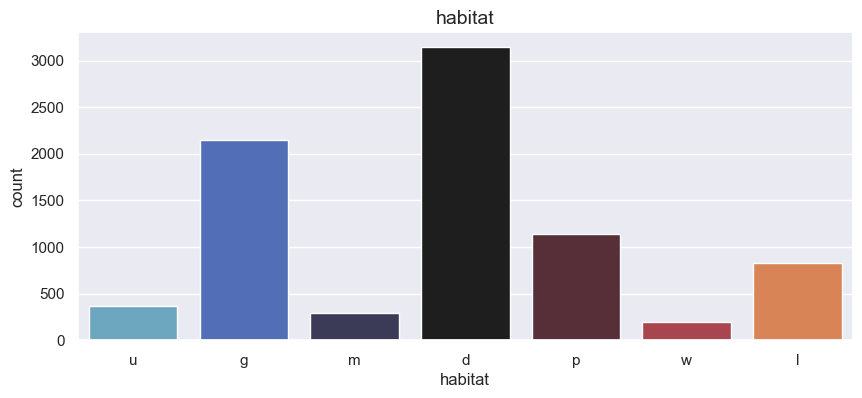

% of total:
habitat
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: count, dtype: float64


In [10]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=Mushroom_df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((Mushroom_df[col].value_counts()/Mushroom_df.shape[0]),4)*100)

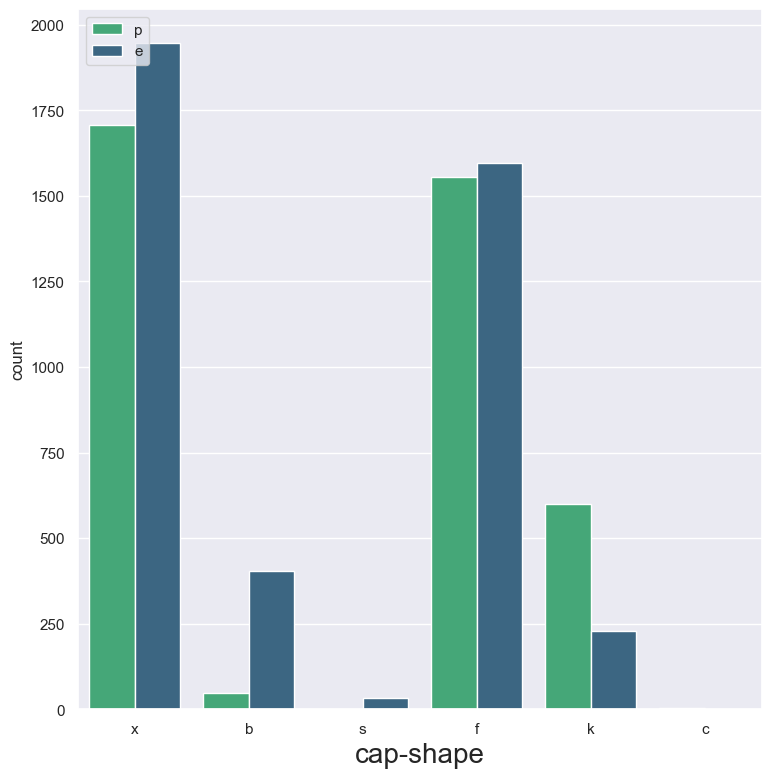

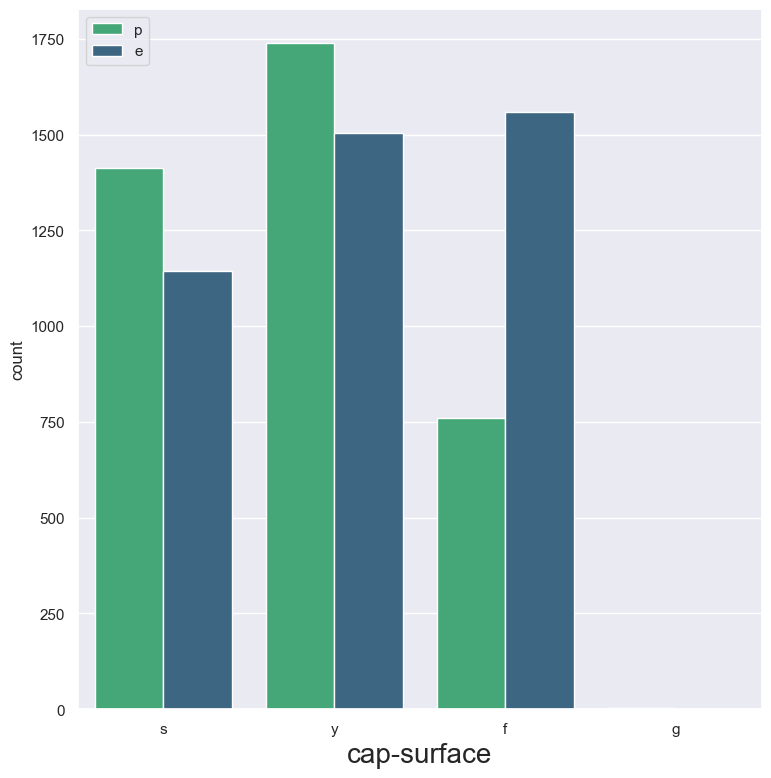

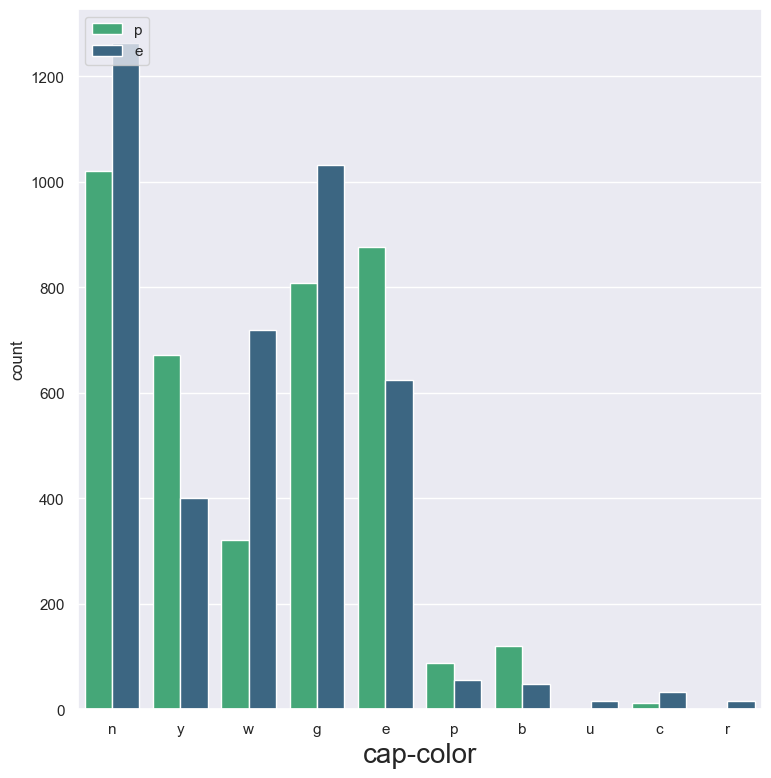

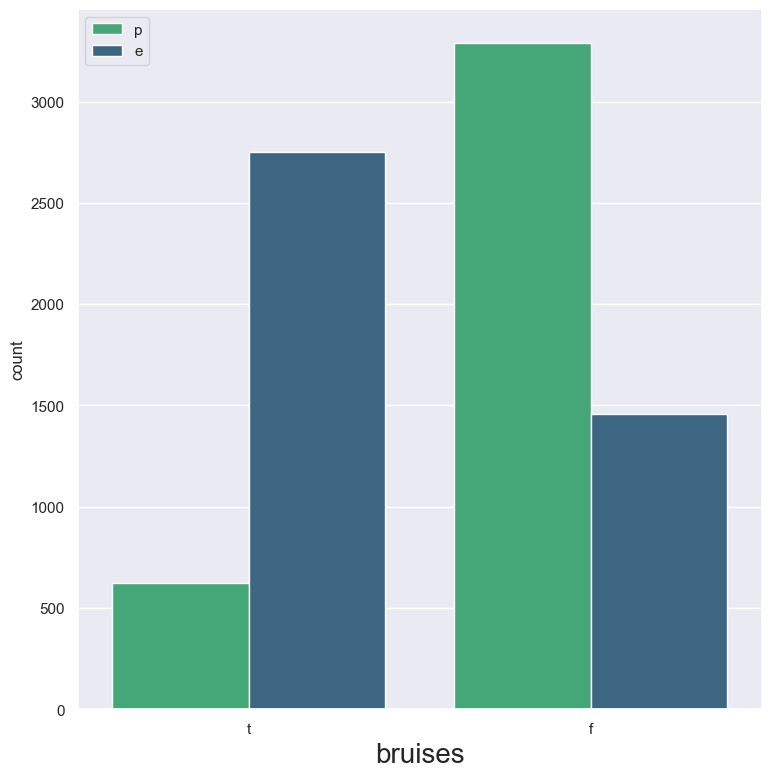

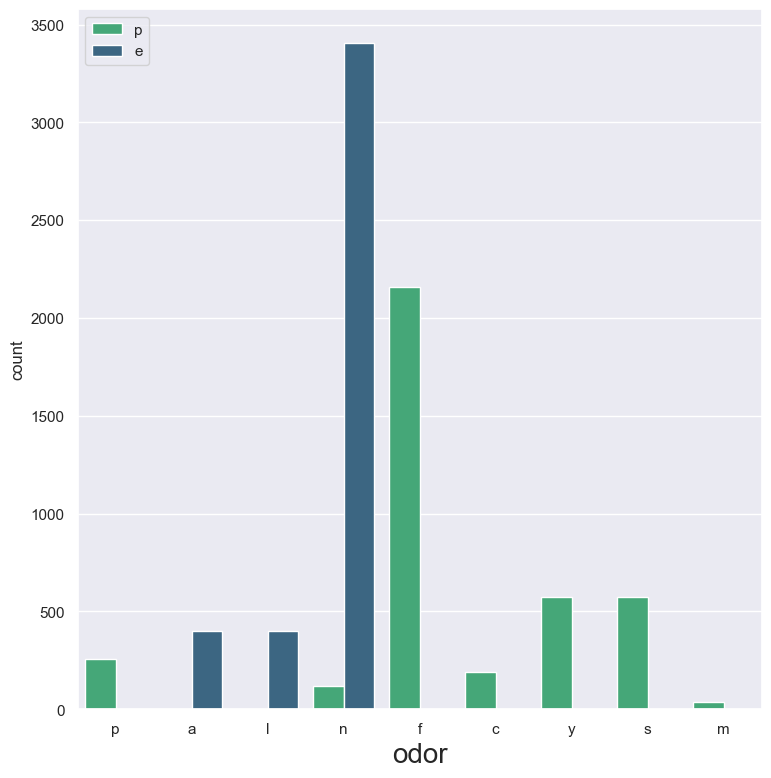

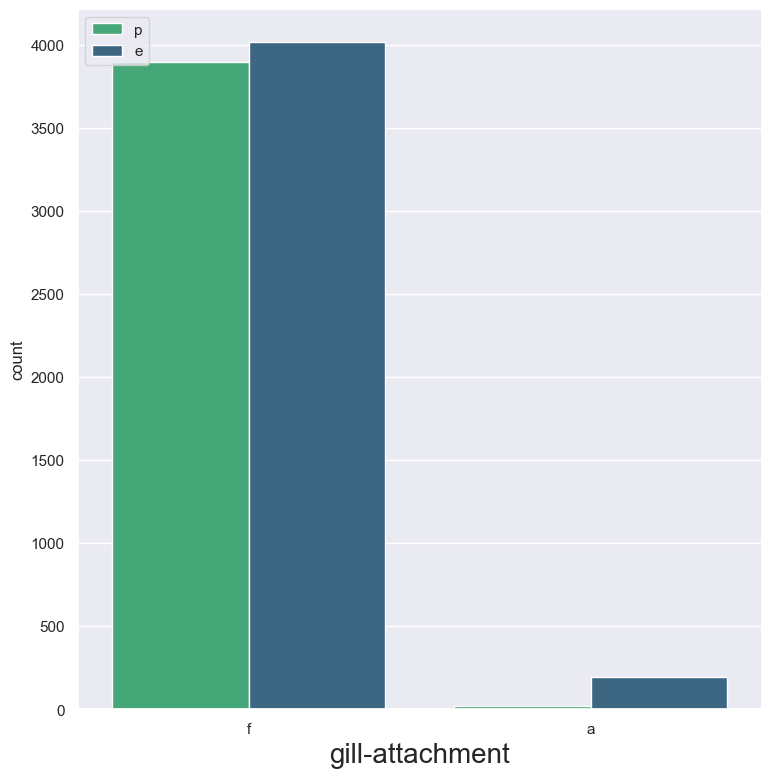

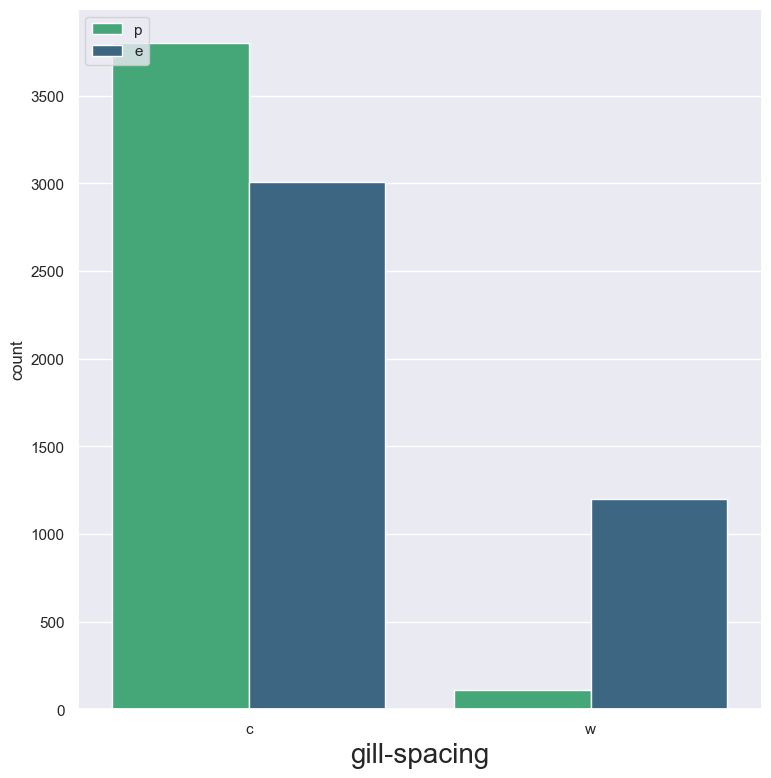

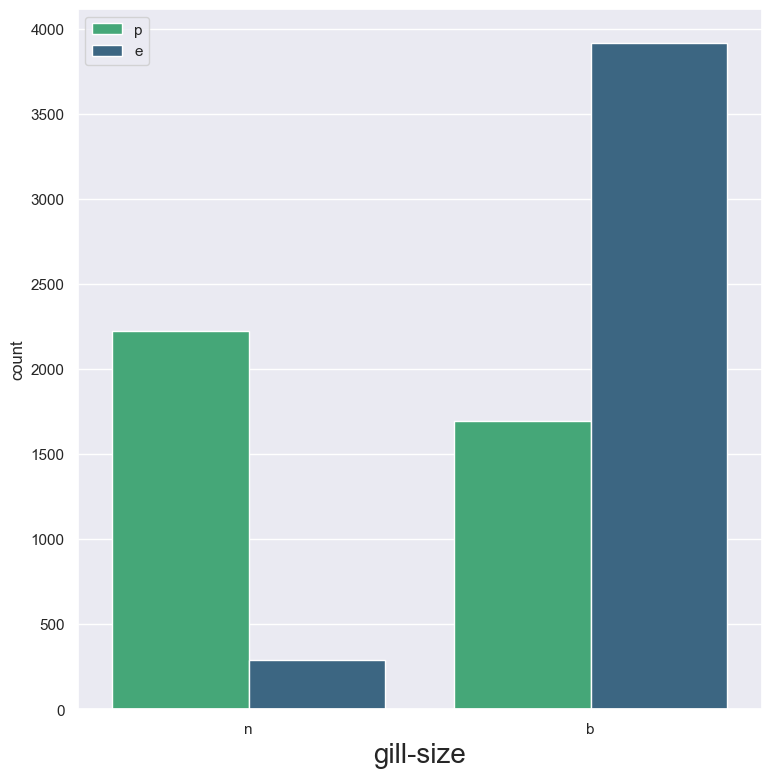

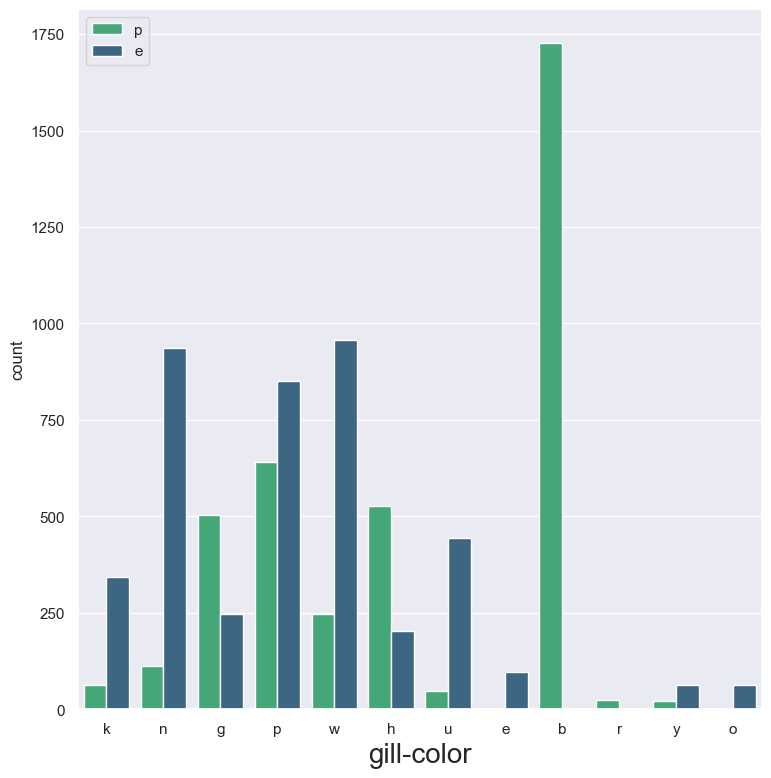

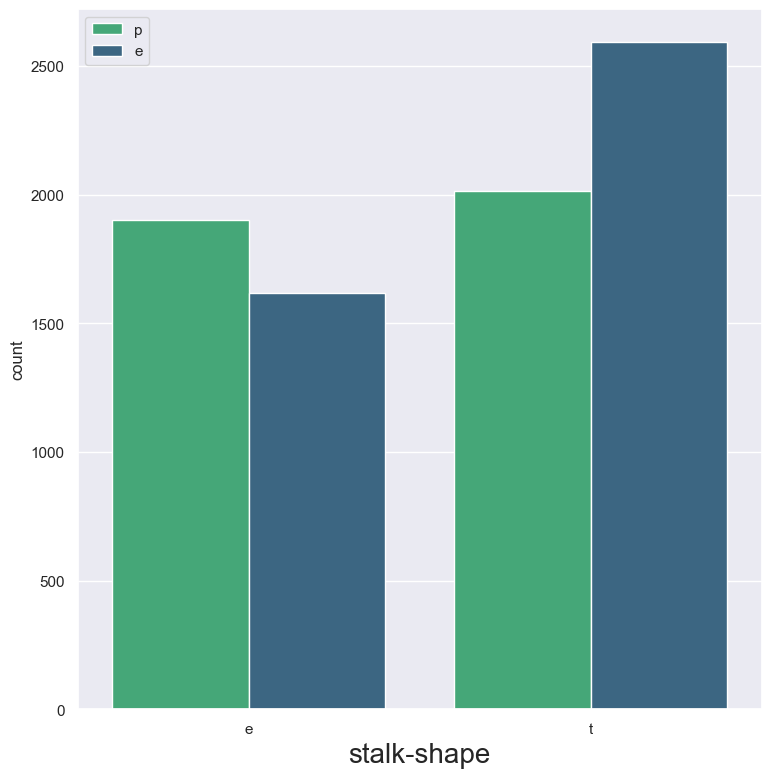

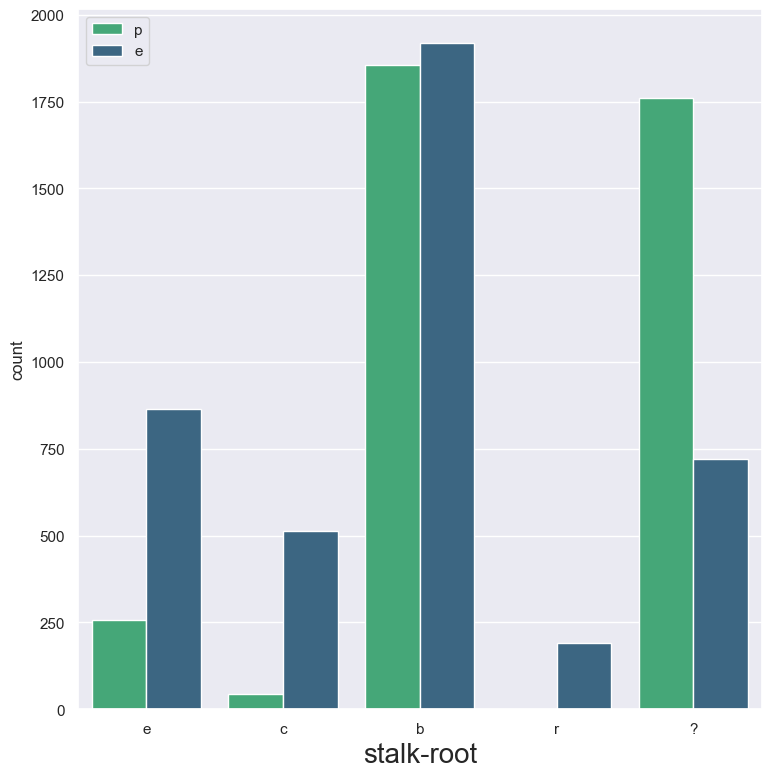

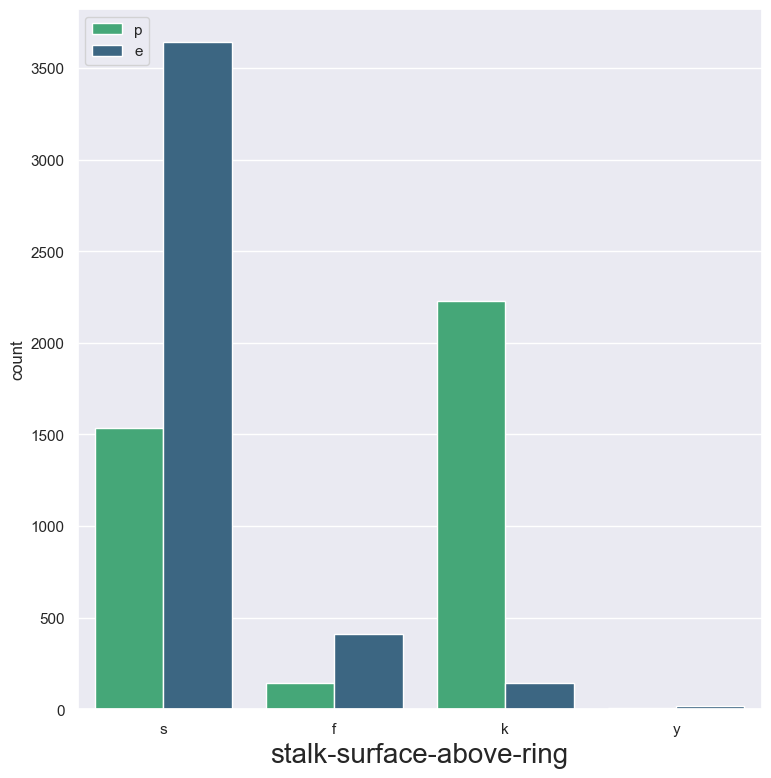

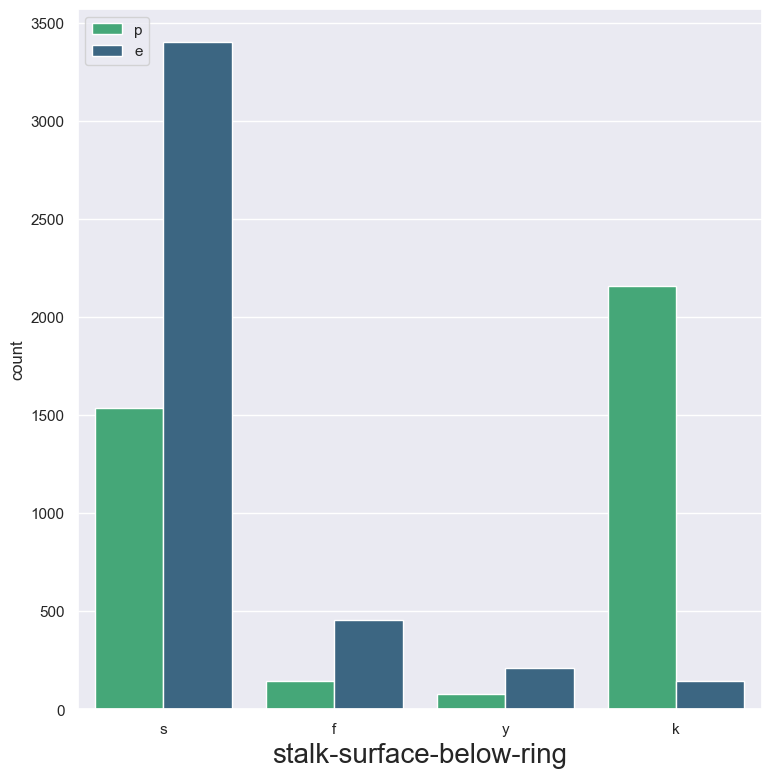

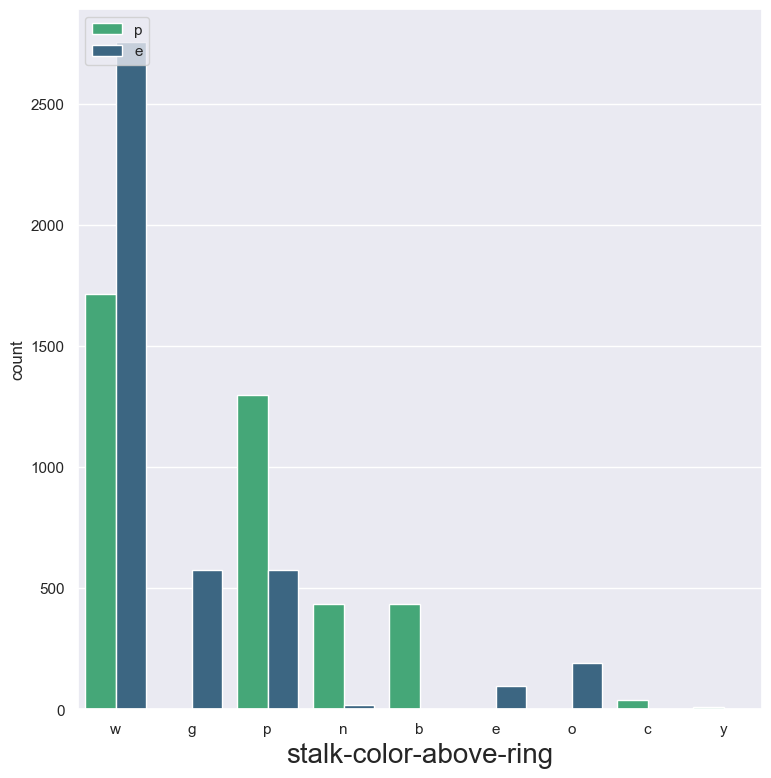

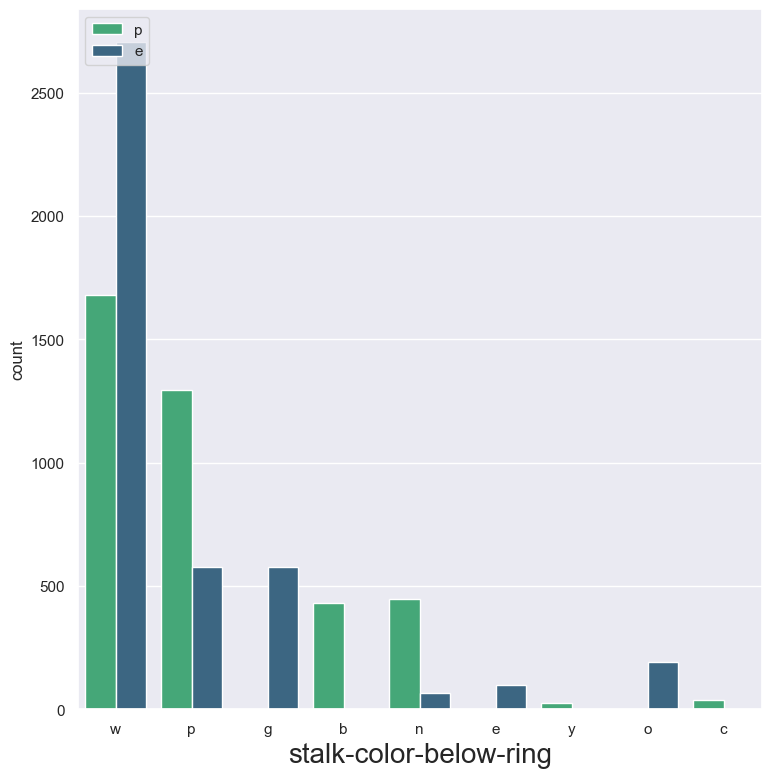

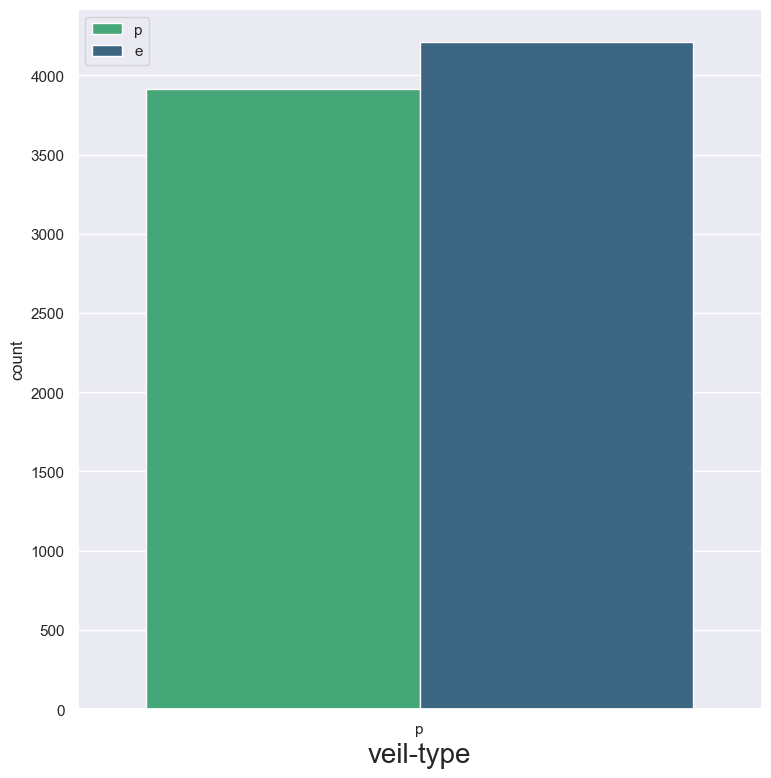

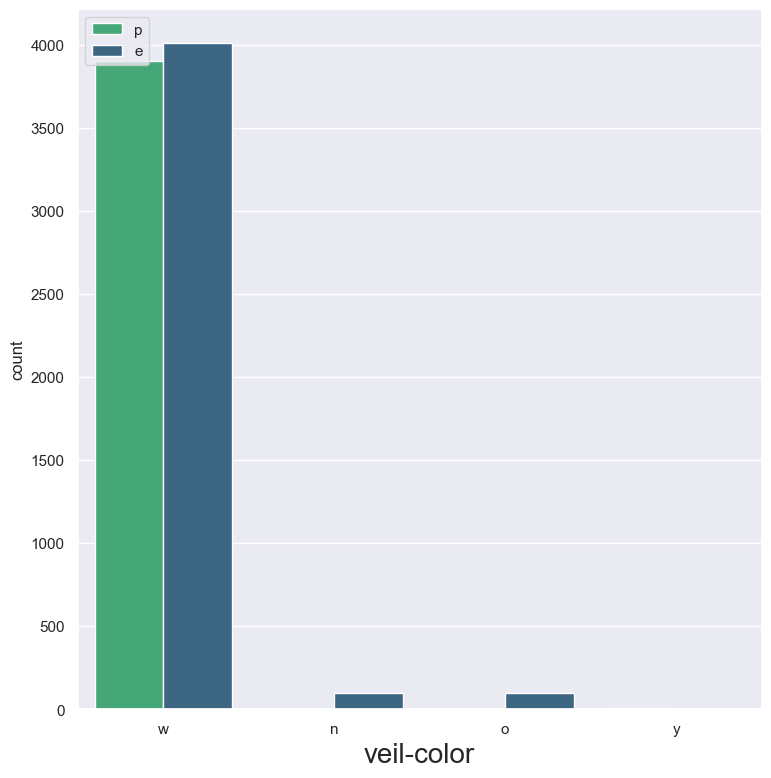

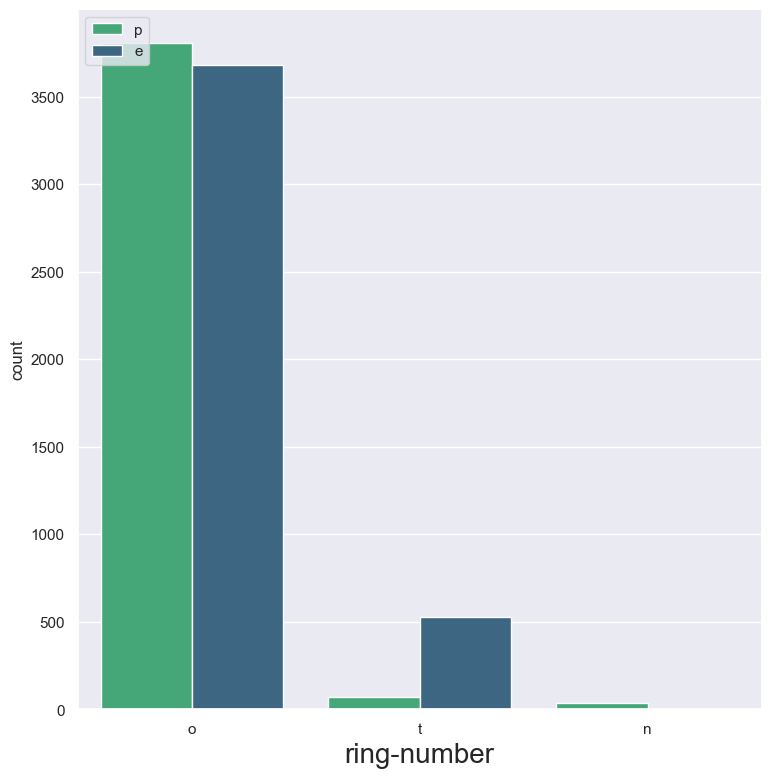

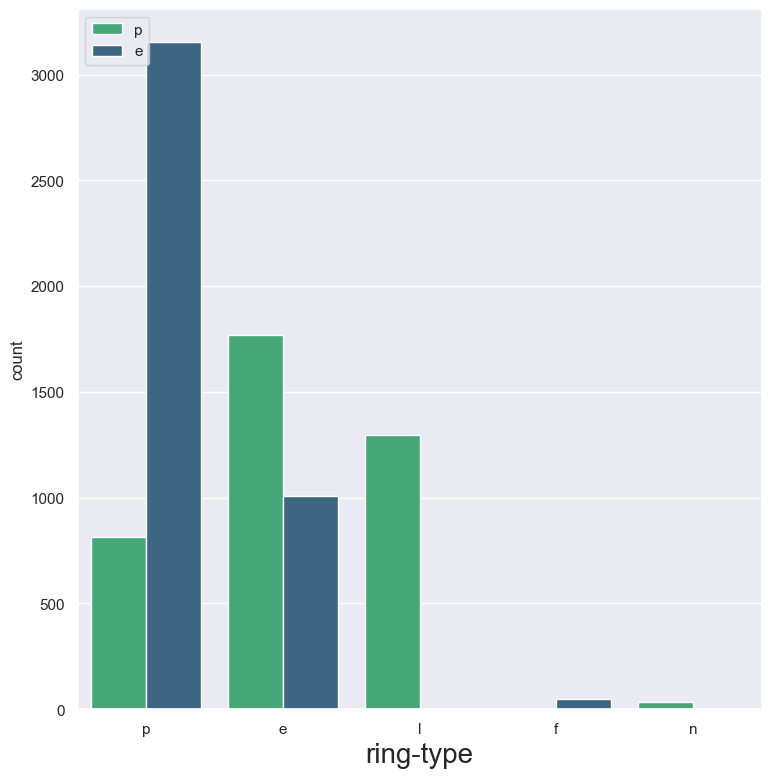

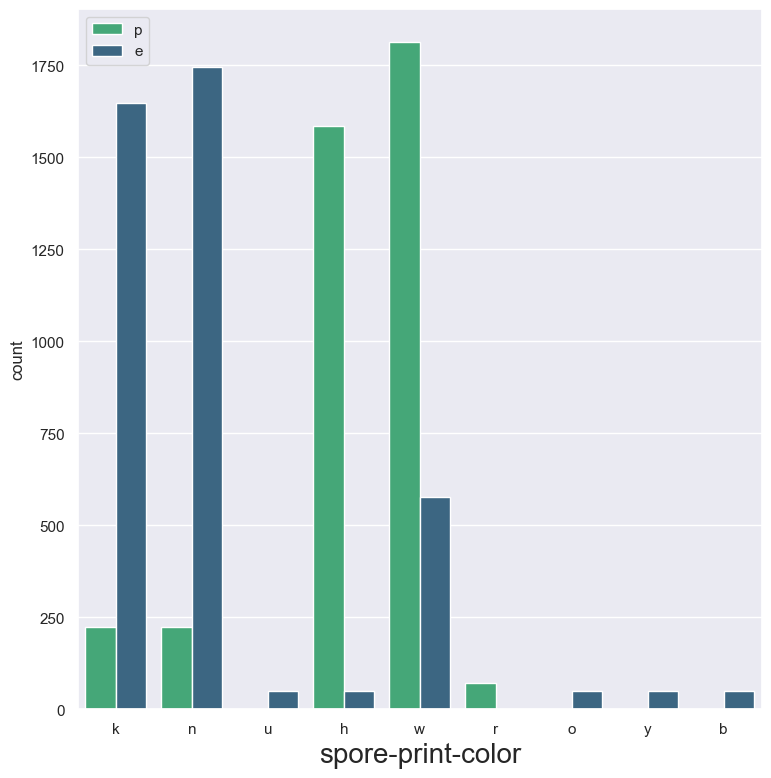

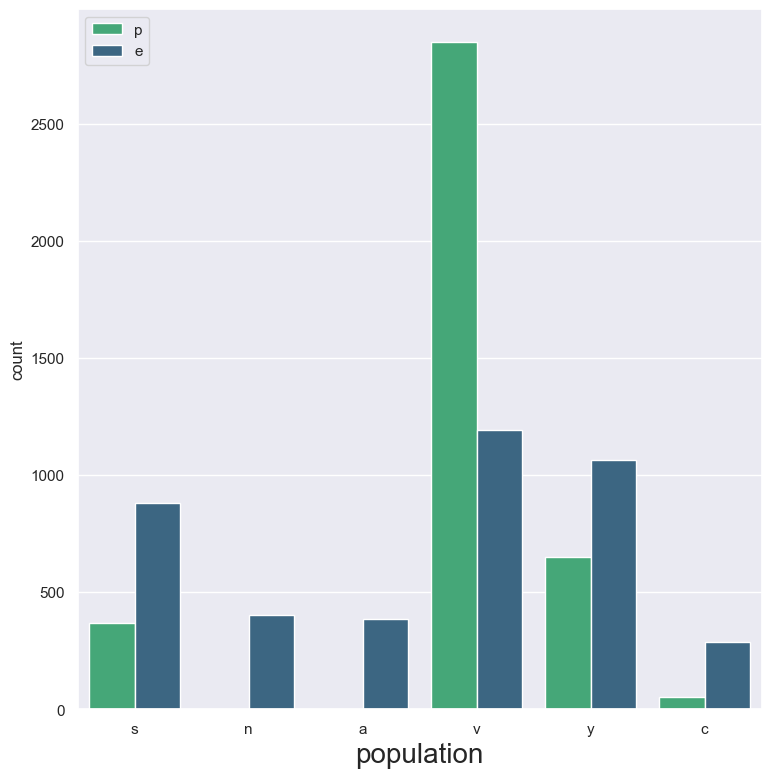

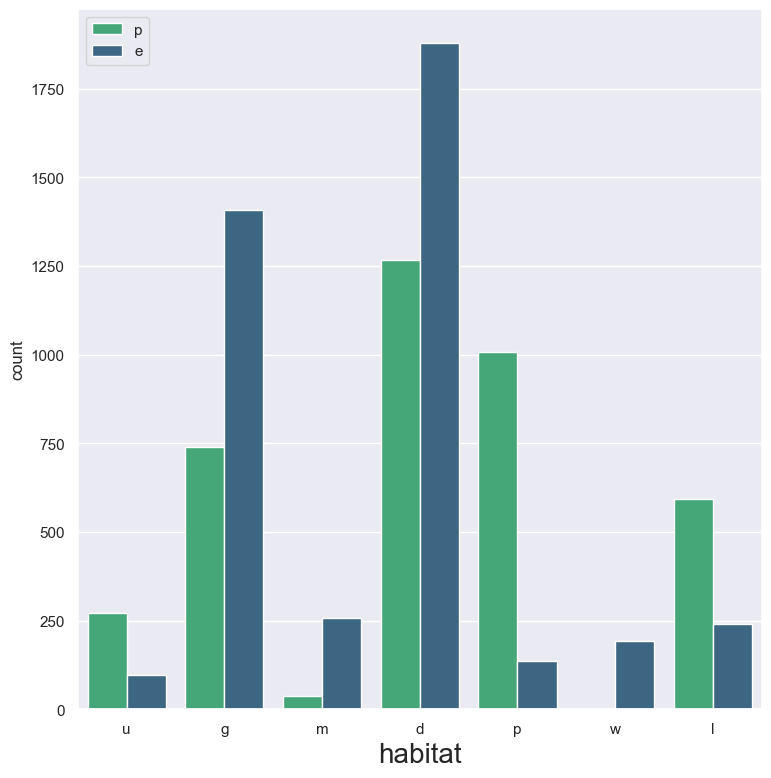

In [12]:
for col in M_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=Mushroom_df ,palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')